In [5]:
import random
random.seed(0)
import numpy
random.seed(0)

import tensorflow as tf
random.seed(0)

In [6]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models

In [7]:
BASE_DIR = "datasets"
IMG_PATH = "datasets/Train/American Bollworm on Cotton/Image_1.jpg"

In [8]:
img = mpimg.imread(IMG_PATH)

In [9]:
print(img.shape)

(416, 416, 3)


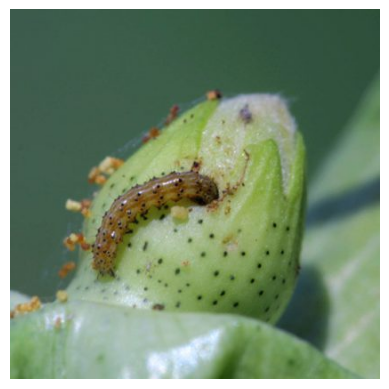

In [12]:
plt.imshow(img)
plt.axis("off")
plt.show()


In [13]:
img_size = 224
batch_size = 32

In [45]:
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [16]:
TRAIN_PATH = "datasets/Train"
TEST_PATH = "datasets/Validation"

In [46]:
train_generator = datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(img_size,img_size),
    batch_size = batch_size,
    class_mode = "categorical"
)


Found 15409 images belonging to 42 classes.


In [47]:
validation_generator = datagen.flow_from_directory(
    TEST_PATH,
    target_size=(img_size,img_size),
    batch_size = batch_size,
    class_mode = "categorical"
)



Found 3163 images belonging to 42 classes.


In [34]:
# Model Definition
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
model = Sequential()
#i/p layer
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(img_size,img_size,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
#o/p layer
model.add(Dense(train_generator.num_classes,activation="softmax"))



c:\Users\HP\OneDrive\Documents\UdyogAi\udyog\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 42)             │        10,794 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,806,186 (182.37 MB)

 Trainable params: 47,806,186 (182.37 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [37]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
history = model.fit(
    train_generator,
    epochs=10,
    validation_data = validation_generator,
    callbacks = [early_stop]
)

Epoch 1/10
101/482 ━━━━━━━━━━━━━━━━━━━━ 7:41 1s/step - accuracy: 0.1636 - loss: 4.4049

c:\Users\HP\OneDrive\Documents\UdyogAi\udyog\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


482/482 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3165 - loss: 2.9749

c:\Users\HP\OneDrive\Documents\UdyogAi\udyog\Lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


482/482 ━━━━━━━━━━━━━━━━━━━━ 609s 1s/step - accuracy: 0.3168 - loss: 2.9733 - val_accuracy: 0.0250 - val_loss: 4.6401
Epoch 2/10
482/482 ━━━━━━━━━━━━━━━━━━━━ 585s 1s/step - accuracy: 0.6584 - loss: 1.2941 - val_accuracy: 0.0642 - val_loss: 5.3055
Epoch 3/10
438/482 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7763 - loss: 0.7878

KeyboardInterrupt: 

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs=10,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size
)

In [51]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D
base_model = MobileNetV2(include_top=False,
    weights='imagenet',
    input_shape=(img_size, img_size, 3))
base_model.trainable = True
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(256,activation="relu"),
    Dropout(0.3),
    Dense(train_generator.num_classes,activation="softmax")
    ])

In [53]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [54]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data = validation_generator,
)

Epoch 1/10
356/482 ━━━━━━━━━━━━━━━━━━━━ 8:54 4s/step - accuracy: 0.1251 - loss: 3.6068

c:\Users\HP\OneDrive\Documents\UdyogAi\udyog\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


482/482 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.1612 - loss: 3.4418

c:\Users\HP\OneDrive\Documents\UdyogAi\udyog\Lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


482/482 ━━━━━━━━━━━━━━━━━━━━ 2157s 4s/step - accuracy: 0.1615 - loss: 3.4406 - val_accuracy: 0.0114 - val_loss: 4.8161
Epoch 2/10
135/482 ━━━━━━━━━━━━━━━━━━━━ 22:40 4s/step - accuracy: 0.5268 - loss: 1.9400

KeyboardInterrupt: 